# Parameterization for sediment released by sea-ice

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import glob
import datetime as dt
import pickle
import scipy.ndimage as ndimage

%matplotlib notebook

Parameters:

In [3]:
# Sub-domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800

# Color map:
N = 256
vals_cont = np.ones((N, 4))
vals_cont[:, 0] = np.linspace(117/N, 1, N)
vals_cont[:, 1] = np.linspace(82/N, 1, N)
vals_cont[:, 2] = np.linspace(60/N, 1, N)
sed_cmap = matplotlib.colors.ListedColormap(vals_cont).reversed()

Load files:

In [4]:
sed_file   = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ice_sediment-20200428.nc')
sed_lons   = np.array(sed_file.variables['nav_lon'])
sed_lats   = np.array(sed_file.variables['nav_lat'])
prop_shelf = np.array(sed_file.variables['prop_shelf'])

Figure:

<IPython.core.display.Javascript object>


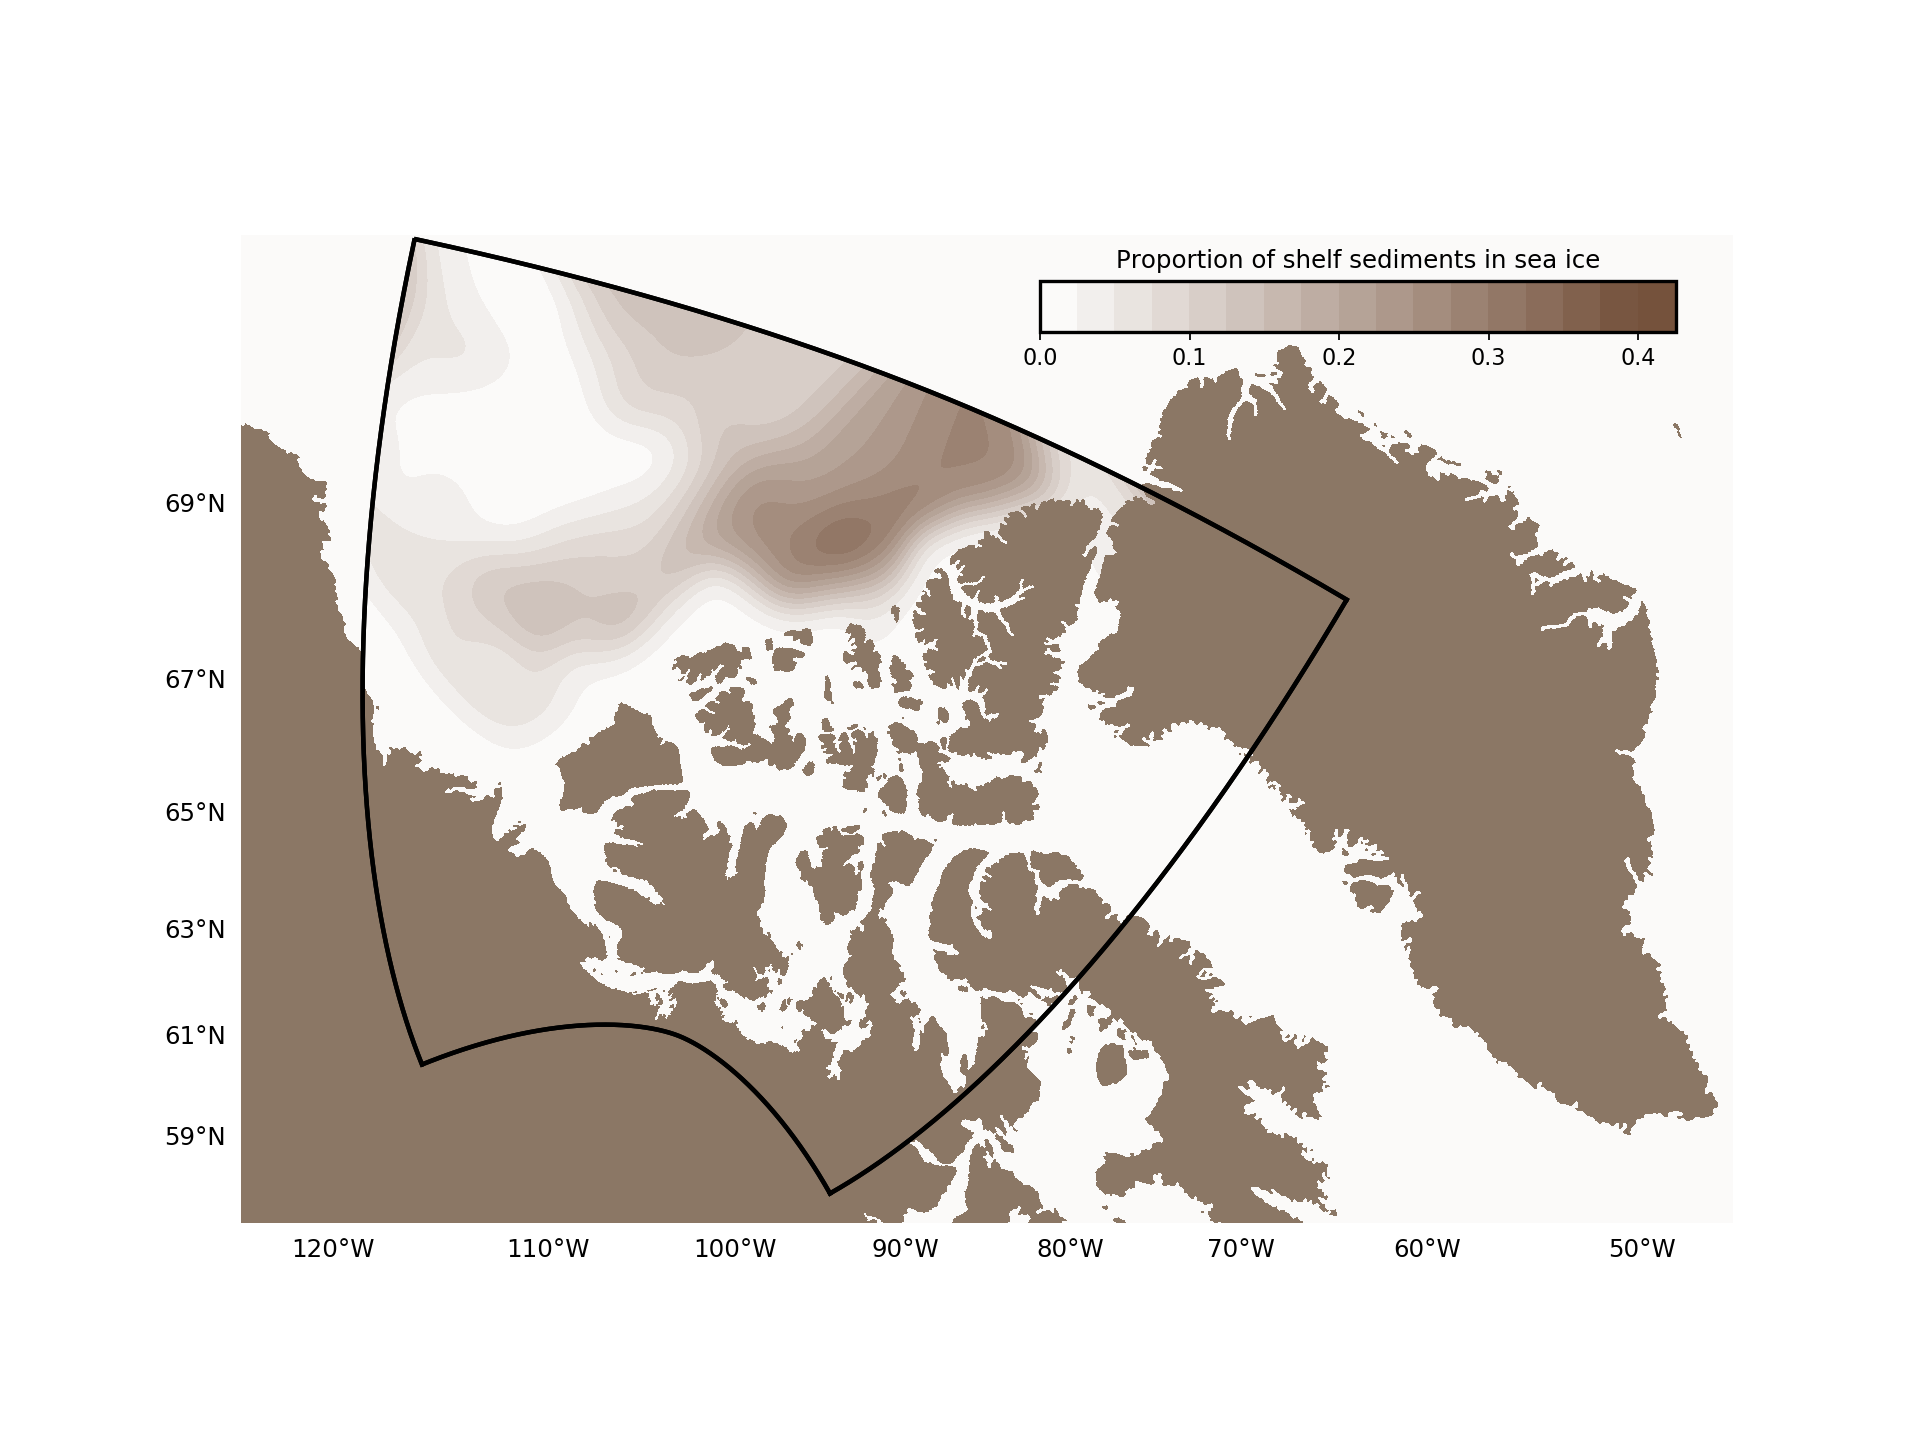

In [7]:
fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

x_sub, y_sub    = proj1(sed_lons, sed_lats)
proj1.plot(x_sub[imin:imax,jmax],   y_sub[imin:imax,jmax],   'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imin:imax,jmax].T, y_sub[imin:imax,jmax].T, 'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imin:imax,jmin],   y_sub[imin:imax,jmin],   'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imin:imax,jmin].T, y_sub[imin:imax,jmin].T, 'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imin,jmin:jmax],    y_sub[imin,jmin:jmax],    'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imin,jmin:jmax].T,  y_sub[imin,jmin:jmax].T,  'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imax,jmin:jmax],    y_sub[imax,jmin:jmax],    'k-', lw=2.0,zorder=5)
proj1.plot(x_sub[imax,jmin:jmax].T,  y_sub[imax,jmin:jmax].T,  'k-', lw=2.0,zorder=5)

CS1 = proj1.contourf(x_sub, y_sub, prop_shelf, vmin=0.0, vmax=0.4, levels=np.arange(0,0.45,0.025), cmap=sed_cmap)

cbaxes1 = fig.add_axes([0.54, 0.77, 0.33, 0.035]) 
CB1 = plt.colorbar(CS1, cax=cbaxes1, orientation='horizontal', ticks=np.arange(0,1.1,0.1))
CB1.ax.tick_params(labelsize=10)
CB1.outline.set_linewidth(1.5)
CB1.ax.set_title('Proportion of shelf sediments in sea ice', fontsize=11)

fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A6-sediments-ice.png', bbox_inches='tight', dpi=300)
fig.savefig('/ocean/brogalla/GEOTRACES/figures/paper1/A6-sediments-ice.svg', bbox_inches='tight', dpi=300, format='svg')